In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
print("All dependencies are imported.")

All dependencies are imported.


In [2]:
data = pd.read_csv('Survival.csv')

In [3]:
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
data.shape

(418, 2)

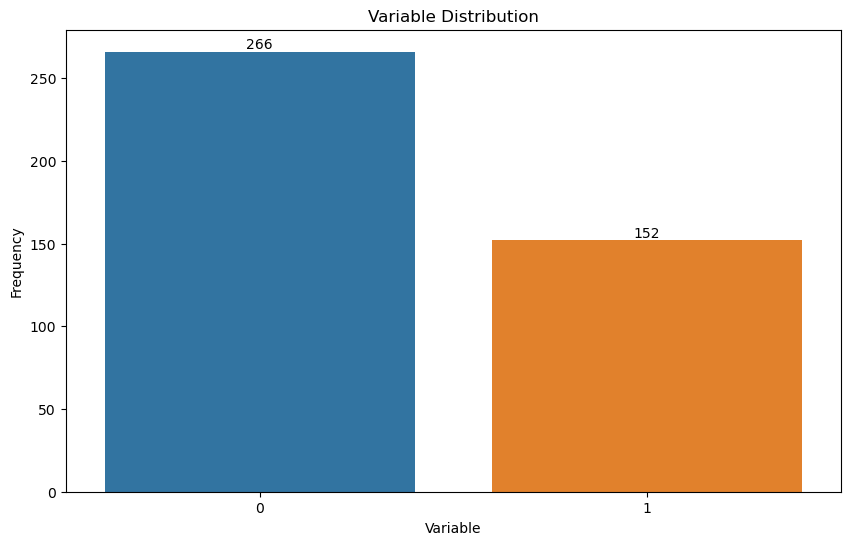

In [9]:
# Ploting Variable , Variable Distribution
plt.figure(figsize=(10,6))
ax=sns.countplot(x=data.iloc[:,-1], data=data)
for con in ax.containers:
    ax.bar_label(con,label_type="edge")
plt.title("Variable Distribution")
plt.xlabel("Variable")
plt.ylabel("Frequency")
plt.show()

In [10]:
print("Y ----------Input Variables------------")
x=data.iloc[:,:-1]
display(x)

Y ----------Input Variables------------


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [17]:
y = data.iloc[:,-1]
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [29]:
max_acc,random=0,0
display(LogisticRegression())
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=i)
    lr=LogisticRegression().fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    if max_acc<=round(accuracy_score(y_test,y_pred)*100,2):
        max_acc=round(accuracy_score(y_test,y_pred)*100,2)
        random=i
        y_pred_best=y_pred
print('Maximum Accuracy:')
print(max_acc)
print('Ramdom State Used:')
print(random)

LogisticRegression()

Maximum Accuracy:
63.49
Ramdom State Used:
49


In [30]:
print("Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=23)
print("Parameters:")
display(LogisticRegression())
lr=LogisticRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy Score:')
print(round(accuracy_score(y_test,y_pred)*100,2))
print('\nPrecision:')
print(round(precision_score(y_test,y_pred)*100,2))
print('\nRecall:')
print(round(recall_score(y_test,y_pred)*100,2))
print('\nF1 Score:')
print(round(f1_score(y_test,y_pred)*100,2))

Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report
Parameters:


LogisticRegression()

Accuracy Score:
63.49

Precision:
0.0

Recall:
0.0

F1 Score:
0.0


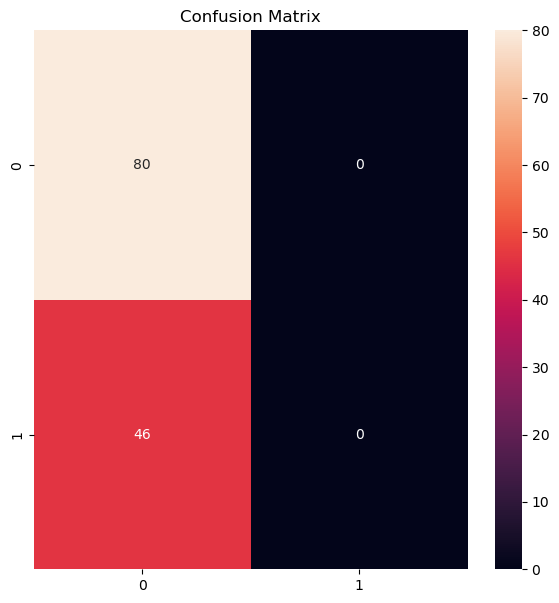

In [24]:
# Ploting confusion matrix
fig=plt.figure(figsize=(7,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

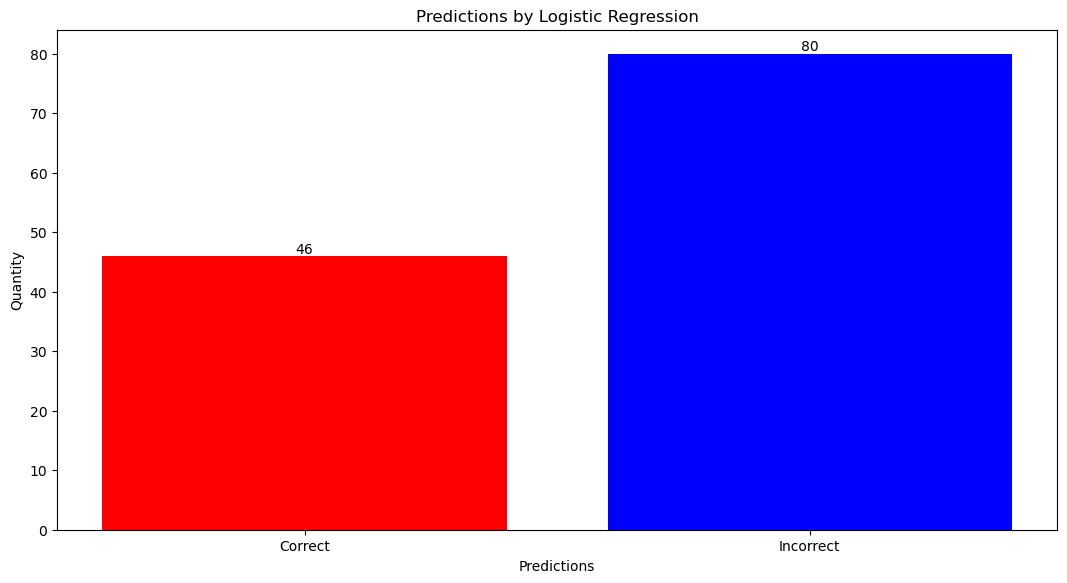

In [32]:
from collections import Counter

d=dict(Counter(list(y_pred==y_test)))
values = list(d.values())
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.bar(range(len(d)), values, tick_label=['Correct','Incorrect'],color=['red','blue'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Predictions by Logistic Regression")
plt.xlabel('Predictions')
plt.ylabel('Quantity')
plt.show()